# Hybrid transforms

**Author :** H. Passe, V. Lebovici

In this notebook, we provide a minimal example of computation of hybrid transforms of weighted cubical complexes using our ```C++``` / ```Python``` library ```Eucalc```. For more details, see [our paper](https://arxiv.org/abs/2405.02256).

**NB:** For more detailed tutorial, see ```general_introduction.ipynb```.

---

**Preliminary:** adding the right folder to path.

In [64]:
import sys
sys.path.append('..')

The original 2D greyscale image.

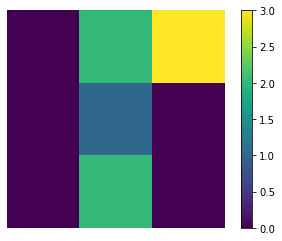

In [65]:
import numpy as np
import matplotlib.pyplot as plt

img = np.array([[0,2,0],[0,1,0],[0,2,3]])
plt.imshow(img, origin='lower')
plt.axis('off')
plt.colorbar()
plt.show()

Computation of the associated weighted cubical complex.

In [66]:
import eucalc
cplx = eucalc.EmbeddedComplex(img)

Preprocessing of the critical points and values.

In [67]:
cplx.preproc_hybrid_transform()

We choose random directions to compute the transform.

In [68]:
directions = np.random.randn(5,2)

Now we can compute hybrid transform for the kernel ```exp``` corresponding to the kernel $\kappa(t) = \exp(-t)$. Kernels ```cos``` and ```sin``` correspond respectively to $\kappa(t) = \cos(t)$ and $\kappa(t) = \sin(t)$.

In [69]:
ht = cplx.compute_hybrid_transform("exp",directions)
print(ht)

[0.18223147 1.48895184 3.27088636 0.57132907 4.49887761]


If we want to plot the transform on a whole grid:

In [70]:
start_x, end_x, num_x = -100, 100, 200
start_y, end_y, num_y = -100, 100, 200

X = np.linspace(start_x, end_x, num_x)
Y = np.linspace(start_y, end_y, num_y)
directions = np.transpose([np.repeat(X, num_y), np.tile(Y, num_x)])

Even when changing the kernel, the preprocessing does not have to be run again:

In [71]:
ht = cplx.compute_hybrid_transform("cos",directions)

We can plot the result:

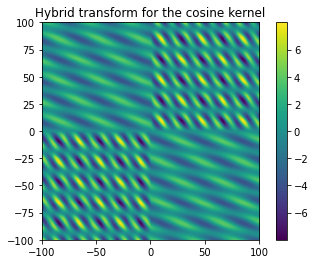

In [72]:
ht = np.flip(np.transpose(np.reshape(ht, (num_x,num_y))), axis=0)       # reshape the array into a (200,200)
plt.imshow(ht,extent=[start_x,end_x,start_y,end_y])
plt.colorbar()
plt.title('Hybrid transform for the cosine kernel')
plt.show()

## Real-world image

Let us now compute the modulus of the hybrid transform with kernel $\kappa(t) = \exp(it)$, called *Euler-Fourier* transform, of an image from the [DRIVE](https://drive.grand-challenge.org/) dataset. See [this GitHub](https://github.com/FDU-VTS/Awesome-Diabetic-Retinopathy-Detection) for references of papers and repositories on diabetic retinopathy detection.

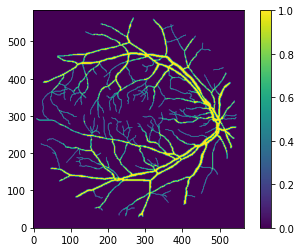

In [73]:
from PIL import Image,ImageOps
raw_img = Image.open('img/drive.png')           # loading the image of segmented blood vessels
gray_img = ImageOps.grayscale(raw_img)          # turning it into greyscale image
img = np.asarray(gray_img).astype(int)//255     # turning it into array with only 0 and 1
plt.figure()
plt.imshow(img, origin='lower')
plt.colorbar()
plt.show()

We create the complex:

In [74]:
cplx = eucalc.EmbeddedComplex(img)
cplx.preproc_ect()

We choose the same grid as before:

In [75]:
print(directions)

[[-100.         -100.        ]
 [-100.          -98.99497487]
 [-100.          -97.98994975]
 ...
 [ 100.           97.98994975]
 [ 100.           98.99497487]
 [ 100.          100.        ]]


We compute the hybrid transform with kernels $\cos$ and $\sin$. Then we compute the module of our transform.

In [76]:
rea = cplx.compute_hybrid_transform("cos", directions)
ima = cplx.compute_hybrid_transform("sin", directions)
ht = np.add(np.square(rea),np.square(ima))

(Optional) : We normalize our transform :

In [77]:
scalar_pdt = np.linalg.norm(directions, axis=1)
ht = np.divide(ht,scalar_pdt)

Finally we reshape the `ht` array and we plot it:

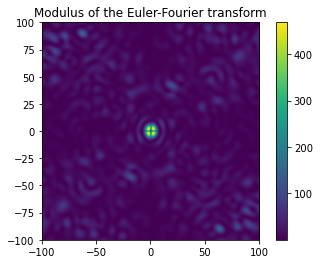

In [78]:
ht = np.flip(np.transpose(np.reshape(ht, (num_x,num_y))), axis=0)
plt.imshow(ht,extent=[start_x,end_x,start_y,end_y])
plt.colorbar()
plt.title('Modulus of the Euler-Fourier transform')
plt.show()